In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy

Populating the interactive namespace from numpy and matplotlib


Consider
$$ x''(t) = -\tanh(x(t)), \quad t \in (0, T), $$
with boundary conditions
$$x(0) = \alpha , \quad x(T) = \beta .$$

Can write as a first order system with
$$ x' = y, \quad y' = -\tanh(x).$$
There is a first integral
$$ \frac{1}{2}y^2 = -\log(\cosh(x)) + C$$

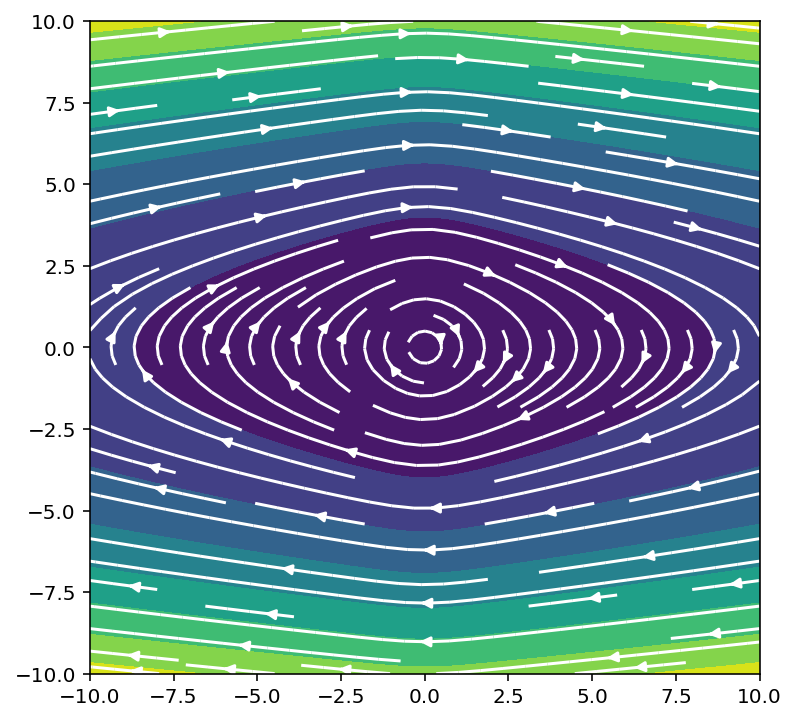

In [18]:
X, Y = meshgrid(
    linspace(-10, 10, 100), 
    linspace(-10, 10, 100))
F2 = -tanh(X)

figure(1, [6, 6])
streamplot(X, Y, Y, F2, color='w');
Z = 0.5*Y**2 + log(cosh(X))
contourf(X, Y, Z);

 Discretize the interval $(0, T)$ into $m+1$ subintervals of length $h = T/(m+1)>0$ and let $t_i = hi$, $x_i = x(t_i)$, $i=0,\ldots,m+1$. The discrete problem is
$$  \frac{1}{h^2}(x_{i-1} - 2x_i + x_{i+1}) + \tanh(x_i) = 0,$$
for $i=1,\ldots,m$.

err_sol = 1.5259156115828711e-10
residual = 3.637978807091713e-12


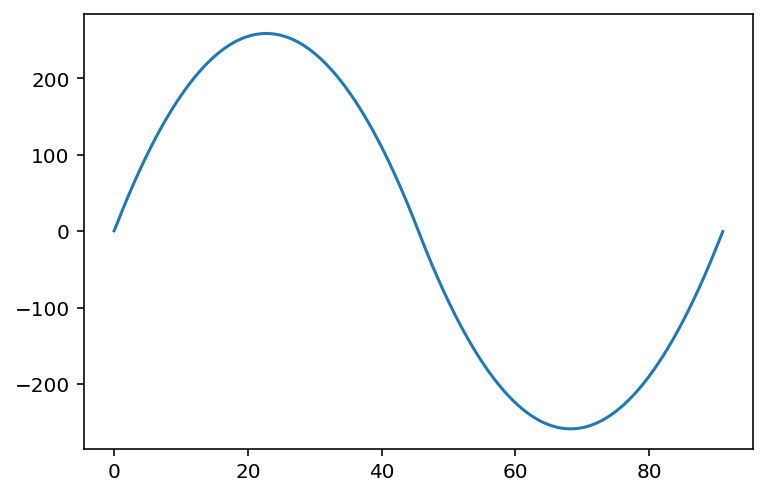

In [53]:
m = 500
T = 91.
h = T/(m+1)
alpha = 0.5
beta = -0.5



def newton_solve(u0, tol, params, max_iter=1000): ## tol should be O(h^2)
    alpha, beta, h = params
    ufull = zeros((m+2))
    ufull[0] = alpha
    ufull[-1] = beta
    u = u0[1:-1].copy()
    A = 1/h**2*(diag(ones(m-1), -1) + diag(-2*ones(m), 0) + diag(ones(m-1), 1))

    for n in arange(max_iter):
        g = A@u + tanh(u)
        J = A + diag(1/cosh(u)**2)
        du = -solve(J, g)
        u = u + du
        x_rel_err = absolute(du).max()/absolute(u).max()
        residual_err = absolute(g).max()
        if residual_err < tol:
            break
    ufull[1:-1] = u
    if n >= max_iter - 1:
        print('warning: max iterations reached without convergence')
        print('err_sol =', absolute(du).max())
        print('residual =', absolute(g).max())
    return ufull

t = linspace(0, T, m+2)

u0 = linspace(alpha, beta, m+2)
u = newton_solve(u0, 1e-12, (alpha, beta, h))
plot(t, u)